**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# *Music Genre Classification with Neural Network Techniques* 

## Abstract

Music genre classification has a wide scope of applications and it has attracted the insterest of numerous researchers to tackle with the classification issue. Based on previous researches, machine learning techniques have proved to be able to identify trends from large pools of data, and ultimately classify the types of music. In this report, a music genre classification project is resolved based on a deep learning algorithm – Neural network. This project is developed in the python compiling environment and TensorFlow is applied as a tool. This paper first discusses the data source, including the class distribution and dimensionality analysis. Two models, Multilayer Perception (MLP) and Convolutional Neural network (CNN), were built to be trained in the project. The result of the two models was analyzed and evaluated for better performance. In the end, we suggest some methods for further improvement of classification.


## 1. Introduction

Categorizing music files according to their genre has been a challenging task in the area of music information retrieval (MIR) for its poorly defined concept and ever-increasing accuracy requirement (Bahuleyan, 2018). Additionally, it does find a wide range of applications in the real world along with the demand for more and more reliable and fast tools for content analysis and description to be used for searches, content queries, and interactive access. For instance, Spotify (which places recommendations based on genre classification to their customers) and Pandora (which generates images according to genre) (Haggblade et al., 2011) are both popular applications using the classification. Thus, it is important to explore an effective approach to address the categorizing problem.
 
Since music genre classification is not a new problem in machine learning, many researchers have attempted to implement different types of algorithms to solve this problem. Among these approaches, Neural network is a classical method, which is exactly the one we applied in this project. Besides Neural network, many other methods like Support Vector Machine (SVM) and K-nearest Neighbors (KNN) are also widely tested by expert programmers (Scaringella et al., 2006).
 
To categorize by genre, music can be abstracted into a series of values based on universal features such as rhythm, form or timbre and then becomes a data point to be analyzed. In practice, Mel Frequency Cepstral Coefficients (MFCC) is a popular way to concisely represent song waveforms (Ayush et al., 2017), which encodes the power spectrum of the sound with the calculation of the Fourier transform of the logarithm of the signal spectrum. Therefore, the experiment in this report also takes the MFCC value as a part of the features vector.
 
In this report, music genre classification project is first implemented by MLP and then improved by CNN method. Additionally, the integral process of the experiment will be thoroughly discussed in this paper.

***Note: The code in the body of this report is only used for explanation and clarification. The complete source code is attached in Appendix which can be executed.***


## 2. Data analysis

The original data for the music genre classification project is a training dataset with 4363 songs, and a test dataset with 6544 songs. For each song, it has 264 features which contain Rhythm Pattern, Chroma and MFCCs information. The feature vector of each song consists of 264 dimensions: 168 values for the rhythm patterns (24 bands, 7 statistics), 48 values for the chroma (12 bands, 4 statistics), and 48 values for the MFCCs (12 bands, 4 statistics). Based on the data source, the goal of this experiment is to classify these songs into 10 possible classes, which is determined based on different music genres.
 
During the early analysis stage, we found that the distribution of training dataset is extremely imbalanced. While the genre ‘Pop_Rock’ occupies approximately 50% of the dataset, the ‘Reggae’ and ‘Blues’ make up only around 2% of the whole set. Besides these three groups, data of other genres is also not balanced. In this case, we considered the performance of training may be affected for it may cause frustrating results. The frustrating results, which may turn out to be a lie of high accuracy, appears because some parts of the training set are perfectly trained whereas some are insufficiently trained due to the imbalance of data.
 
To be more visual about the class distribution, the figure below shows the imbalanced distribution of data. As presented, the number for ‘Pop_Rock’ appears to be the highest in the histograms.

![musicdistribution.png](./musicdistribution.png)


## 3. Methods and experiments
### 3.1 Frameworks and Libraries

We have heard of TensorFlow for a long time and knew it is a framework developed by Google using Neural network. It is a popular approach to develop predictive models nowadays. However, we did not have the chance to learn TensorFlow and dive into it. This project is a great opportunity for us to implement TensorFlow in a real project. In addition, 
Tensorflow has very simple and clear syntax and it is very convenient to implement Neural network model with TensorFlow. Its built-in methods save us a lot of time and we can still achieve desirable performance without too much code.

Besides TensorFlow, we also use sklearn to help us split the dataset into training set and validation set, preprocess the data and generate confusion matrix. Another two libraries, seaborn and  matplotlib, are used for data visualization. Numpy is used for scientific computing and pandas for importing files.



### 3.2 Neural network Methods

Neural network has attracted more and more attention in the last few decades because of its key advantages that make it most suitable for certain problems and situations. Firstly, Neural network is very powerful to learn and model non-linear and complex relationships, which is really crucial because in real-life, a great number of the relationships between inputs and outputs are non-linear as well as complex. Secondly, unlike many other prediction techniques, Neural network does not impose many restrictions on the input variables. It gives the data scientist more flexibility to implement the tool.
 
In this project, we used two types of Neural network—multilayer perception and convolutional Neural network. Multilayer perception is the one of the simplest Neural network. It consists of multiple neurons (nodes) arranged in layers. Nodes from adjacent layers have connections between them. All these connections have weights related to them. The layers can be divided into input layers, hidden layer, and output layer. Because the model contains one or more hidden layers, this type of Neural network is referred to as multilayer perception.
 
CNN differs from MLP, because it takes advantage of local spatial coherence in the input variables (often images), which allows them to have fewer weights as some parameters are shared. This process makes them especially well-suited to extract relevant information at a low computational cost. 
 
Both of these two methods are easily implemented using Tensorflow.


### 3.3 Experimental Process

To have a complete structure of our experiment, the flow of process is shown in figure 2.
We firstly import the data file into Jupyter Notebook, preprocess the data, and split the dataset. This part is related to preparation for the input data. Then we start to build the model, train the model and evaluate the model. After multiple iterations of modifying the model, we make predications on test data, save the result into a text file and submit it on Kaggle.

![](./process.png)

These processes are also clearly listed in our source code (appendix ). There are several points we need to mention in the experiment process.
 
For the methodology of evaluation, we use the  Cross-Validation(CV). The validation is used to make sure that the model developed has got most of the patterns from the data correct, low on bias and variance. And in this project,  it is conducted during the phase of data splitting. The main code of the validation implementation is shown below.


```python
sss = StratifiedShuffleSplit(n_splits=2,
                             test_size=0.2,
                             random_state=0)
```

To implement the cross evaluation, we directly call the ***StratifiedShuffleSplit*** function from the python sklearn library. This function firstly shuffles the training dataset, and then splits the data into n_splits parts ( Which is set as 2 here). After this step, it picks one part to use as a test set. Then it repeats the same process n_splits-1 other times, to get n_splits-1 other test set. As for test_size, we set it 0.2 because based on practice we determine 80% of the training set as train data and 20% as test data for the model training process. Considering the report as a reproducible documentation, we give random_state a fixed number 0. Thus, everyone can consistently see the same output as the first run. 

The StratifiedShuffleSplit CV object is actually a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class. It is an efficient method though has the risk of overlapping.

For model using MLP, there are three hidden layers, with 256, 128, and 64 nodes, respectively. The output layer contains 10 nodes, which corresponds to 10 categorical labels. After each layer, we implemented dropout to combat overfitting in the training process. The batch size is 64 and the number of epochs is 50 after we have evaluate the accuracy result.

```python
layers = tf.keras.layers

model_mlp = tf.keras.models.Sequential()
model_mlp.add(layers.Dense(256, activation=tf.nn.relu, input_shape=(X_train.shape[1],)))
model_mlp.add(layers.Dropout(0.2))
model_mlp.add(layers.Dense(128, activation=tf.nn.relu))
model_mlp.add(layers.Dropout(0.2))
model_mlp.add(layers.Dense(64, activation=tf.nn.relu))
model_mlp.add(layers.Dropout(0.2))
model_mlp.add(layers.Dense(10, activation=tf.nn.softmax))

optimizer = tf.train.AdamOptimizer()

model_mlp.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

For model using CNN, we built a single convolutional layer. The filters represent the number of channels, which we choose as 32. We refactor the shape of one group of dataset on the basis of 12 after we analyze the structure of the dataset. After the single convolutional layer, we add a max-pooling layer, which is also considered as downgrading layer. It can decrease the spatial size of the representation to lower the amount of parameters and computation in the network, and hence to also control overfitting. We flatten the dataset and add two other layers to let the data fit into the output layer. The number of epochs is 60 after we have evaluate the accuracy result.

```python
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, input_shape=(12, 22)))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
```

The standard that we determine the epochs of the training is to make the accuracy of training set and validation set as close as possible. 

There are two evaluation metrics used in the Kaggle competitions:
 
**Categorical Accuracy**
$$
    Accuracy = \frac{|y_{\rm true}=y_{\rm predicted}|}{N}.
    \label{sigmoid}
$$
Where N is the total number of data samples, 𝑦𝑡𝑟𝑢𝑒 is a vector containing the actual class of
all samples, and 𝑦 𝑝𝑟𝑒𝑑𝑖𝑐𝑡𝑒𝑑is a vector containing the predicted classes for all samples.

**Multiclass logarithmic loss**
$$
log-loss = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{M} y_{\rm i,j}log(p_{\rm i,j})
$$
Where N is the total number of data samples, M is the total number of classes, 𝑦𝑖,𝑗 is an indicator function that outputs 1 when the sample i is assigned to class j, 0 otherwise; and 𝑝𝑖,𝑗is the predicted probability that the sample i belongs to class j.


## 4. Results

The performance of the model is represented by log-loss and categorical accuracy in this project. 

For method using MLP, after 34 training epochs, the log-loss and the accuracy of the training set reach 1.0121 and 0.6785, respectively, while those metrics of validation set end at 1.1171 and 0.6667, respectively. By using this training model, we predicted the labels of test dataset and submitted the results on Kaggle. The results for log-loss and accuracy with partial validation are 0.57361 and 0.20235. 

For method using MLP, after 64 training epochs, the log-loss and the accuracy of the training set reach 0.9761 and 0.6751, respectively, while those metrics of validation set end at 1.1832 and 0.6438, respectively. By using this training model, we predicted the labels of test dataset and submitted the results on Kaggle. The results for log-loss and accuracy with partial validation are 0.58329 and 0.20249. 

![](./result.png)


We also plotted the confusion matrix for validation set using MLP model. The validation set contains 873 groups of data, as we split the whole training dataset (4363 groups of data) into two sets with the percentage of 80 and 20. From figure below, we can obtain that the CV method split the dataset quite well. The data with all 10 kinds of labels are contained in the validation set. It is clear that data with label 1 (Pop_Rock) is still the majority of the dataset, which makes up around 41% of the total number of groups. 

![](./confusion.png)

## 5. Discussion/Conclusions

For training with MLP model, the accuracies of training set and validation set are both better compared to the result in Kaggle. We think it is because the model is still not trained sufficiently due to imbalanced dataset. The log loss in Kaggle is much better than training set and validation set, which results from normalization in the evaluation process in Kaggle. Thus, the sum of the probabilities of each data sample is not equal to 1. 

The same observation is obtained for CNN model. It gets similar result compared to MLP model. It does not exhibit better performance in spite of its advanced structure and concepts, which might be the reason that we still do not understand the concepts well and are not able to set up the optimal parameters for the model.

The log loss and accuracy of the dataset have a negative relation. As the training proceeds, the accuracy becomes higher, while the log loss becomes lower. Considering the definition of accuracy and log loss, it is not hard to understand the trends. When making the correct prediction on one set of music, the probability of the right label is the highest among all the labels. Thus the accuracy becomes higher and log loss becomes lower.

One interesting result from the confusion matrix is that the model did not predict label 7 (International) for the validation set, which means the model is not able to learn the characteristic of this genre and make predictions on label 7. Besides this, the model makes some prediction on label 10. It is, however, not able to predict the result correctly. We assume the characteristics of label 10 is considerably similar to another types of music, so within this amount of training data, it does not have the ability to distinguish between this genre and other genres. 

These consequences can be traced back to the imbalanced training dataset. The more a specific group of data is, the greater effect it can impose on the model. For example, the data with label 1 has significant influence on the model, so it is clear from the confusion matrix that the model are more likely to make prediction on label 1. 

To improve the performance of the model, we have changed the method to split the dataset at the beginning of the processing, changed some parameters (number of layers, dense of each layer, dropout of each layer, batch size, kernel size, epochs) in the model, calculate the accuracy and log-loss. However, we have not been able to make huge progress compared to our first model. At that point, we realized the models we have built are not capable of handling the imbalanced dataset so we focus on resampling the data in the following update. 

We have attempted to implement random resampling and update the model by more balanced dataset. However, due to the limited time, we are not able to find the right approach to resample the data before submitting the report. The result is even worse compared to our previous submission. 

For future improvement, we will continue understanding the concepts and structure of Neural networks and try to test with more tunable parameters.

In the project, we have successfully implemented two neural networks models. In this project, we have successfully trained two neural network models, MLP and CNN, which are built with TensorFlow. We compared the results and analyzed and improved the performance of the two models. We passed the benchmark in Kaggle competition within three weeks, and continue optimizing the performance of the model. Throughout the project, we have gained a deeper understanding of how neural networks solve real-life problems and obtained some hands-on experience with popular frameworks and libraries.


## 6. References

Bahuleyan, H. (2018). Music Genre Classification using Machine Learning Techniques. arXiv preprint arXiv:1804.01149.
 
Haggblade, M., Hong, Y., & Kao, K. (2011). Music genre classification. Department of Computer Science, Stanford University.
 
Scaringella, N., Zoia, G., & Mlynek, D. (2006). Automatic genre classification of music content: a survey. IEEE Signal Processing Magazine, 23(2), 133-141.
 
Kumar, A., Siva, B. K. S., Reddy, G. S., & Rashmi, M. R. (2017). MUSIC GENRE CLASSIFICATION.

What are the advantages of a convolutional neural network (CNN) compared to a simple neural network from the theoretical and practical perspective?
https://www.quora.com/What-are-the-advantages-of-a-convolutional-neural-network-CNN-compared-to-a-simple-neural-network-from-the-theoretical-and-practical-perspective

Convolutional Neural Networks (CNNs / ConvNets)
http://cs231n.github.io/convolutional-networks/#pool

A Quick Introduction to Neural Networks
https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/


## Appendix

### Read in Data

In [4]:
!pip install tensorflow
!pip install -U scikit-learn

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sn

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already up-to-date: scikit-learn in /Users/marongjun/anaconda3/lib/python3.6/site-packages (0.20.0)
Requirement not upgraded as not directly required: scipy>=0.13.3 in /Users/marongjun/anaconda3/lib/python3.6/site-packages (from scikit-learn) (1.1.0)
Requirement not upgraded as not directly required: numpy>=1.8.2 in /Users/marongjun/anaconda3/lib/python3.6/site-packages (from scikit-learn) (1.14.3)
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
train_data = pd.read_csv(r"train_data.csv", header=None)
train_label = pd.read_csv(r"train_labels.csv", header=None, names=['label'])

### Plot distribution of music genres

In [6]:
# count the number of each label
train_label['label'].value_counts()

labels = train_label['label'].value_counts()
print(labels)

1     2178
2      618
3      326
6      260
4      253
5      214
8      195
7      141
9       92
10      86
Name: label, dtype: int64


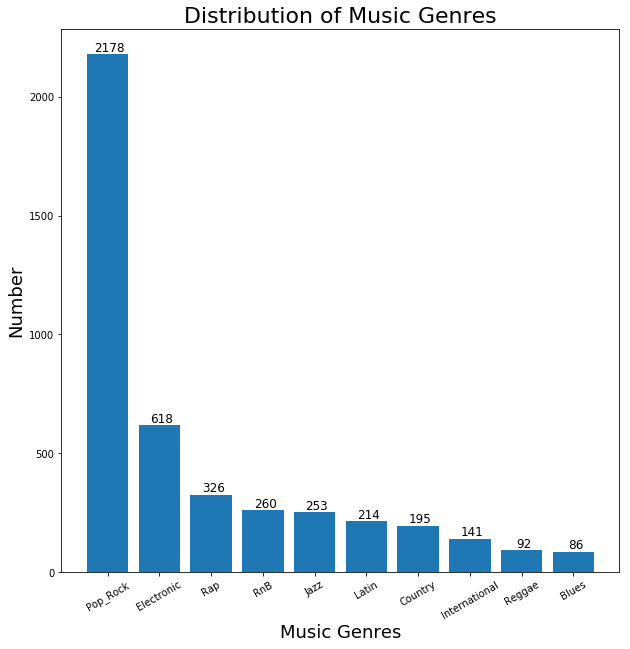

In [7]:
N = 10

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
label_count = labels.values

fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(ind, label_count)

# add some text for labels, title and axes ticks
ax.set_xlabel('Music Genres', fontsize=18)
ax.set_ylabel('Number', fontsize=18)
ax.set_title('Distribution of Music Genres', fontsize=22)
plt.xticks(np.arange(10),['Pop_Rock','Electronic','Rap','RnB','Jazz','Latin','Country','International','Reggae','Blues'], rotation=30)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/1.8, 1.00*height,
                '%d' % int(height), fontsize='large',
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

In [8]:
# check the shape of the dataset
train_data.shape

(4363, 264)

In [9]:
train_set = train_data.assign(label=train_label.label)

train_set["label"] = train_set.label - 1

In [10]:
# check head of the dataset
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,255,256,257,258,259,260,261,262,263,label
0,1040.7,2315.6,2839.1,2552.2,2290.4,1913.8,2152.6,1930.3,2079.3,1706.7,...,0.36548,0.093584,0.166870,0.083426,0.118090,0.089792,0.074371,0.073162,0.059463,0
1,2309.4,4780.4,4055.7,3120.5,1979.9,2343.6,2634.2,3208.5,3078.0,3374.7,...,0.14739,0.102560,0.213040,0.082041,0.080967,0.076450,0.052523,0.052357,0.055297,0
2,2331.9,4607.0,4732.3,5007.0,3164.9,3171.9,2915.7,3282.3,2400.0,1895.2,...,0.36321,0.114200,0.223780,0.100770,0.186910,0.067270,0.061138,0.085509,0.049422,0
3,3350.9,6274.4,5037.0,4609.7,3438.8,3925.8,3746.4,3539.4,3053.7,3075.4,...,0.28950,0.074124,0.201580,0.049032,0.130210,0.045800,0.080885,0.148910,0.042027,0
4,2017.6,3351.8,2924.9,2726.3,1979.9,1930.9,2083.4,1889.2,1695.4,1911.7,...,0.38266,0.079402,0.063495,0.053717,0.086750,0.062090,0.048999,0.033159,0.070813,0


In [11]:
feature_col_names = list(range(264))

### Preprocessing Data

In [12]:
train_subset = train_set

X = train_subset[feature_col_names].values
y = train_subset.label.values

In [13]:
# Noramalize the dataset

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

### Split into Train/Validation Set Using Stratefied Sampling

In [14]:
sss = StratifiedShuffleSplit(n_splits=2, 
                             test_size=0.2,
                             random_state=0)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [15]:
X_train.shape

(3490, 264)

In [16]:
X_test.shape

(873, 264)

### Method 1: Multilayer Perception (MLP)

In [17]:
layers = tf.keras.layers

model_mlp = tf.keras.models.Sequential()
model_mlp.add(layers.Dense(256, activation=tf.nn.relu, input_shape=(X_train.shape[1],)))
model_mlp.add(layers.Dropout(0.2))
model_mlp.add(layers.Dense(128, activation=tf.nn.relu))
model_mlp.add(layers.Dropout(0.2))
model_mlp.add(layers.Dense(64, activation=tf.nn.relu))
model_mlp.add(layers.Dropout(0.2))
model_mlp.add(layers.Dense(10, activation=tf.nn.softmax))

optimizer = tf.train.AdamOptimizer()

model_mlp.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model_mlp.fit(X_train, y_train, batch_size=64, epochs=34, shuffle=True, validation_data=(X_test, y_test))


Train on 3490 samples, validate on 873 samples
Epoch 1/34
3490/3490 [==============================] - 2s 532us/step - loss: 1.6953 - acc: 0.4857 - val_loss: 1.4923 - val_acc: 0.5120
Epoch 2/34
3490/3490 [==============================] - 1s 387us/step - loss: 1.5031 - acc: 0.5235 - val_loss: 1.3843 - val_acc: 0.5567
Epoch 3/34
3490/3490 [==============================] - 1s 369us/step - loss: 1.4119 - acc: 0.5564 - val_loss: 1.2932 - val_acc: 0.5945
Epoch 4/34
3490/3490 [==============================] - 1s 373us/step - loss: 1.3353 - acc: 0.5799 - val_loss: 1.2510 - val_acc: 0.6048
Epoch 5/34
3490/3490 [==============================] - 1s 372us/step - loss: 1.2990 - acc: 0.5862 - val_loss: 1.2907 - val_acc: 0.5899
Epoch 6/34
3490/3490 [==============================] - 1s 380us/step - loss: 1.2773 - acc: 0.5963 - val_loss: 1.2210 - val_acc: 0.6208
Epoch 7/34
3490/3490 [==============================] - 1s 409us/step - loss: 1.2680 - acc: 0.5951 - val_loss: 1.2370 - val_acc: 0.6025
E

### Plot Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix for Validation Set')

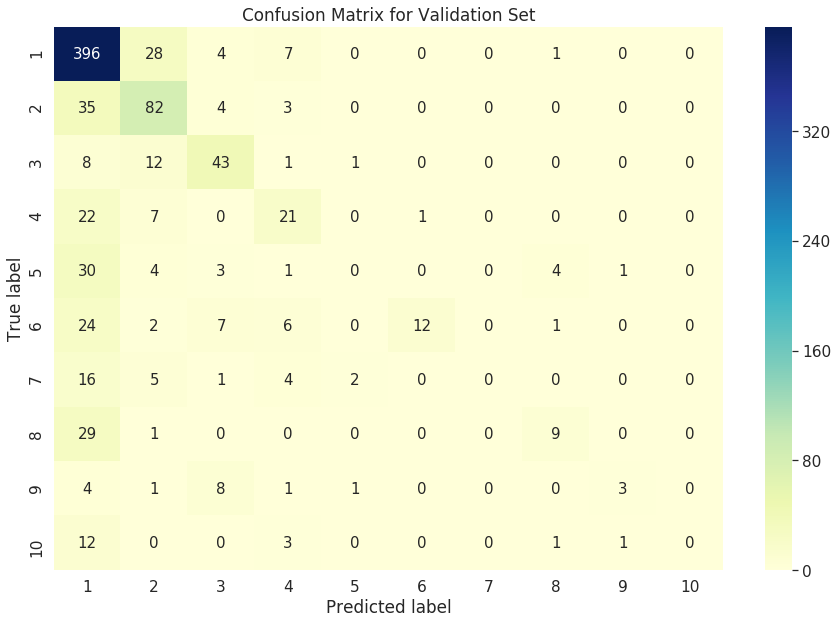

In [19]:
matrix_predictions = model_mlp.predict(X_test)
matrix_res = []
for i in range(0, 873):
    matrix_res.append(np.argmax(matrix_predictions[i]))

array = confusion_matrix(y_test, matrix_res)

df_cm = pd.DataFrame(array, range(1,11), range(1,11))
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4)#for label size
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, cmap="YlGnBu", fmt="d")# font size
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title("Confusion Matrix for Validation Set")

### Make predictions and save accuracy result to text file

In [20]:
test_data=pd.read_csv('test_data.csv',header=None)
test_data = test_data.values
test = min_max_scaler.fit_transform(test_data)
predictions = model_mlp.predict(test)
res = []
for i in range(0, 6544):
    res.append(np.argmax(predictions[i])+1)
# print(predictions[40])

submission = np.column_stack((np.arange(1,6545), np.array(res)))

solution = np.savetxt("solution_mlp.csv", submission, delimiter=',',fmt=['%i','%i'], header="Sample_id,Sample_label", comments='')

### Make predictions and save log-loss result to text file

In [21]:
test_data=pd.read_csv('test_data.csv',header=None)
test_data = test_data.values
test = min_max_scaler.fit_transform(test_data)
predictions = model_mlp.predict(test)

submission_log = np.column_stack((np.arange(1,6545), predictions))

solution = np.savetxt("solution_mlp_logloss.csv", submission_log, delimiter=',',fmt=['%d','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f'], header="Sample_id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Class_10", comments='')

### Method 2: Convolutional Neural Networks (CNN)

In [22]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K

batch_size = 64
num_classes = 10
epochs = 61

x_train, x_test = X_train, X_test

x_train_new = x_train.reshape(x_train.shape[0], 12, 22).astype('float32')
x_test_new = x_test.reshape(x_test.shape[0], 12, 22).astype('float32') 

y_train_new = keras.utils.to_categorical(y_train, num_classes)
y_test_new = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, input_shape=(12, 22)))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_new, y_train_new,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_new, y_test_new))

Using TensorFlow backend.


Train on 3490 samples, validate on 873 samples
Epoch 1/61
3490/3490 [==============================] - 5s 1ms/step - loss: 1.6926 - acc: 0.4928 - val_loss: 1.5882 - val_acc: 0.5166
Epoch 2/61
3490/3490 [==============================] - 5s 1ms/step - loss: 1.5390 - acc: 0.5112 - val_loss: 1.4713 - val_acc: 0.5258
Epoch 3/61
3490/3490 [==============================] - 5s 1ms/step - loss: 1.4499 - acc: 0.5390 - val_loss: 1.3582 - val_acc: 0.5716
Epoch 4/61
3490/3490 [==============================] - 5s 1ms/step - loss: 1.3969 - acc: 0.5501 - val_loss: 1.3221 - val_acc: 0.5876
Epoch 5/61
3490/3490 [==============================] - 5s 1ms/step - loss: 1.3560 - acc: 0.5630 - val_loss: 1.3263 - val_acc: 0.5945
Epoch 6/61
3490/3490 [==============================] - 5s 1ms/step - loss: 1.3128 - acc: 0.5756 - val_loss: 1.2958 - val_acc: 0.5945
Epoch 7/61
3490/3490 [==============================] - 5s 1ms/step - loss: 1.2835 - acc: 0.5868 - val_loss: 1.2832 - val_acc: 0.6094
Epoch 8/61
3490

### Make predictions and save accuracy result to text file

In [23]:
test_data=pd.read_csv('test_data.csv',header=None)
test_data = test_data.values
test = min_max_scaler.fit_transform(test_data)
test_data_new = test.reshape(test.shape[0], 12, 22).astype('float32') 
predictions = model.predict(test_data_new)
res = []
for i in range(0, 6544):
    res.append(np.argmax(predictions[i])+1)

submission = np.column_stack((np.arange(1,6545), np.array(res)))

solution = np.savetxt("solution_cnn.csv", submission, delimiter=',',fmt=['%i','%i'], header="Sample_id,Sample_label", comments='')

### Make predictions and save log-loss result to text file

In [24]:
test_data=pd.read_csv('test_data.csv',header=None)
test_data = test_data.values
test = min_max_scaler.fit_transform(test_data)
test_data_new = test.reshape(test.shape[0], 12, 22).astype('float32') 
predictions = model.predict(test_data_new)

submission_log = np.column_stack((np.arange(1,6545), predictions))

solution = np.savetxt("solution_cnn_logloss.csv", submission_log, delimiter=',',fmt=['%d','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f'], header="Sample_id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Class_10", comments='')